<a href="https://colab.research.google.com/github/akshayonly/BioNER-MeSH-Net-Graph/blob/main/mesh_vs_ner_pubmed_abstract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Subject Heading Vs. Named Entity Recognition

In this article, we'd explore BioNER and MeSH terms for building and visualizing network graphs of any PubMed articles.

CONTENT
1. Title
2. Introduction
3. PubMed, Medline & Entrez
4. Medical subject headings (MeSH)
5. Biological Named-entity recognition (BioNER)
6. Building & Visualising Graphs
  1. Networkx
  2. Pyvis
7. Abstract as Network Graph
8. MeSH terms as Network Graph
9. Conclusion
10. References

## All Libraries

In [1]:
'''
!pip install -q biopython
!pip install -q pyvis
!pip install -q nxviz
!pip install -q scispacy
!pip install -q https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz

import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

import networkx as nx
import pyvis as nt

from Bio import Entrez
from Bio import Medline

import os
from tqdm import tqdm

import scispacy
import spacy
nlp = spacy.load("en_ner_bc5cdr_md")
'''

'\n!pip install -q biopython\n!pip install -q pyvis\n!pip install -q nxviz\n!pip install -q scispacy\n!pip install -q https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz\n\nimport pandas as pd\nimport seaborn as sns\nimport networkx as nx\nimport matplotlib.pyplot as plt\n\nimport networkx as nx\nimport pyvis as nt\n\nfrom Bio import Entrez\nfrom Bio import Medline\n\nimport os\nfrom tqdm import tqdm\n\nimport scispacy\nimport spacy\nnlp = spacy.load("en_ner_bc5cdr_md")\n'

## Introduction

In [2]:
# Pass

## PubMed & Entrez

In [3]:
!pip install -q biopython

In [4]:
from Bio import Entrez
from Bio import Medline

## Medical Subject Headings (MeSH)

In [5]:
def fetch_data(pmids):
    """Returns MEDLINE record associated with the PMID(s)"""
    
    Entrez.email = 'akishirsath@gmail.com'

    handle = Entrez.efetch(db="pubmed", 
                           id=pmids, 
                           rettype="medline", 
                           retmode="text")

    records = Medline.parse(handle)    
    
    return list(records)

In [6]:
pmid = '29614878'

In [7]:
data = fetch_data(pmid)
data

[{'AB': "OBJECTIVES: To provide a clinical update for general psychiatrists on the assessment and diagnosis of Alzheimer's disease (AD), highlighting current issues regarding epidemiology, risk factors and pathophysiology from recent relevant research findings. CONCLUSIONS: Psychiatrists can apply their skills and training in the diagnosis of AD, which is based upon a comprehensive assessment comprising history, investigations, and cognitive and functional assessment, guided by accepted diagnostic criteria.",
  'AD': ['Neuropsychiatrist, Neuropsychiatry Unit, Royal Melbourne Hospital, Parkville, VIC, and; Melbourne Neuropsychiatry Centre, University of Melbourne, and; NorthWestern Mental Health, Melbourne, VIC, Australia.',
   'Neuropsychiatrist, Neuropsychiatry Unit, Royal Melbourne Hospital, Parkville, VIC, and; Department of Psychiatry, University of Melbourne, and; NorthWestern Mental Health, Melbourne, VIC, Australia.',
   'Neuropsychiatrist, Neuropsychiatry Unit, Royal Melbourne 

In [8]:
data_dict = data[0]

In [9]:
for field_desc, data in (data_dict.items()):
  print(f"{field_desc}\t{data}")

PMID	29614878
OWN	NLM
STAT	MEDLINE
DCOM	20190405
LR	20190405
IS	1440-1665 (Electronic) 1039-8562 (Linking)
VI	26
IP	4
DP	2018 Aug
TI	Alzheimer's disease: clinical update on epidemiology, pathophysiology and diagnosis.
PG	347-357
LID	10.1177/1039856218762308 [doi]
AB	OBJECTIVES: To provide a clinical update for general psychiatrists on the assessment and diagnosis of Alzheimer's disease (AD), highlighting current issues regarding epidemiology, risk factors and pathophysiology from recent relevant research findings. CONCLUSIONS: Psychiatrists can apply their skills and training in the diagnosis of AD, which is based upon a comprehensive assessment comprising history, investigations, and cognitive and functional assessment, guided by accepted diagnostic criteria.
FAU	['Eratne, Dhamidhu', 'Loi, Samantha M', 'Farrand, Sarah', 'Kelso, Wendy', 'Velakoulis, Dennis', 'Looi, Jeffrey Cl']
AU	['Eratne D', 'Loi SM', 'Farrand S', 'Kelso W', 'Velakoulis D', 'Looi JC']
AD	['Neuropsychiatrist, Neuropsy

In [10]:
data_dict.get('MH', 'NONE')

['*Alzheimer Disease/diagnosis/epidemiology/physiopathology', 'Humans']

## Biological Named-entity recognition (BioNER)

Biomedical named entity recognition (BioNER) is an important and challenging task for understanding biomedical texts. It aims to recognize named entities (NEs), such as diseases, gene, species, etc., in biomedical texts and plays an important role in many downstream natural language processing (NLP) tasks, such as drug-drug interaction task and knowledge base completion

In [11]:
!pip install -q nxviz
!pip install -q scispacy
!pip install -q https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz

In [12]:
import scispacy
import spacy

nlp = spacy.load("en_ner_bc5cdr_md")

In [13]:
abstract = data_dict.get('AB', 'NONE')

In [14]:
abstract

"OBJECTIVES: To provide a clinical update for general psychiatrists on the assessment and diagnosis of Alzheimer's disease (AD), highlighting current issues regarding epidemiology, risk factors and pathophysiology from recent relevant research findings. CONCLUSIONS: Psychiatrists can apply their skills and training in the diagnosis of AD, which is based upon a comprehensive assessment comprising history, investigations, and cognitive and functional assessment, guided by accepted diagnostic criteria."

In [15]:
doc = nlp(abstract)
print("TEXT", "START", "END", "ENTITY TYPE")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

TEXT START END ENTITY TYPE
Alzheimer's disease 102 121 DISEASE
AD 336 338 DISEASE
cognitive and functional assessment 427 462 DISEASE


## Building & Visualising Graphs with Networkx & Pyvis

In [16]:
!pip install -q networkx
!pip install -q pyvis

Create an empty graph with no nodes and no edges.

In [17]:
import networkx as nx

G = nx.Graph()

The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we’ll look at simple manipulations. You can add one node at a time,

In [18]:
G.add_node(1)

or add nodes from any iterable container, such as a list

In [19]:
G.add_nodes_from([2, 3, 4, 5, 6])

By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [20]:
G.add_edge(1, 2)

In [21]:
edges_list = [(1, 5), (2, 3), (2, 5), (3, 4), (4, 5), (4, 6)]

G.add_edges_from(edges_list)

In [22]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [23]:
G.edges()

EdgeView([(1, 2), (1, 5), (2, 3), (2, 5), (3, 4), (4, 5), (4, 6)])

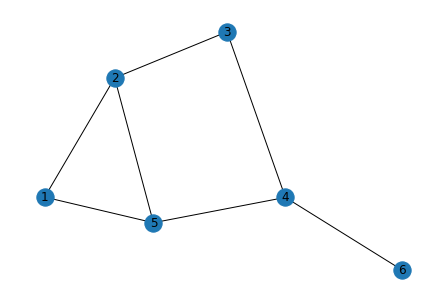

In [24]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.show() 

In [25]:
G.number_of_edges()

7

In [26]:
G.number_of_nodes()

6

In [27]:
list(G.neighbors(5))

[1, 2, 4]

In [28]:
sorted(nx.common_neighbors(G, 1, 4))

[5]

In [29]:
for node in G.nodes:
    print(node, list(G.neighbors(node)))

1 [2, 5]
2 [1, 3, 5]
3 [2, 4]
4 [3, 5, 6]
5 [1, 2, 4]
6 [4]


### Abstract as Network Graph

### MeSH terms as Network Graph

## References
- https://www.nlm.nih.gov/bsd/mms/medlineelements.html
- https://hhs.github.io/meshrdf/qualifiers
- https://www.nlm.nih.gov/mesh/introduction.html